#  Time Series Forecasting Project - Part 2: Rose.csv

## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Importing neccesary libraries Required:

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))


## 1.1  Read the data as an appropriate Time Series data and plot the data.

In [ ]:
# read data
df = pd.read_csv("/content/sample_data/Rose.csv")
df = pd.DataFrame(df)

In [ ]:
# top rows
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [ ]:
# last  rows
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [ ]:
# number of rows and columns
df.shape

(187, 2)

## 1.2 Plot the data

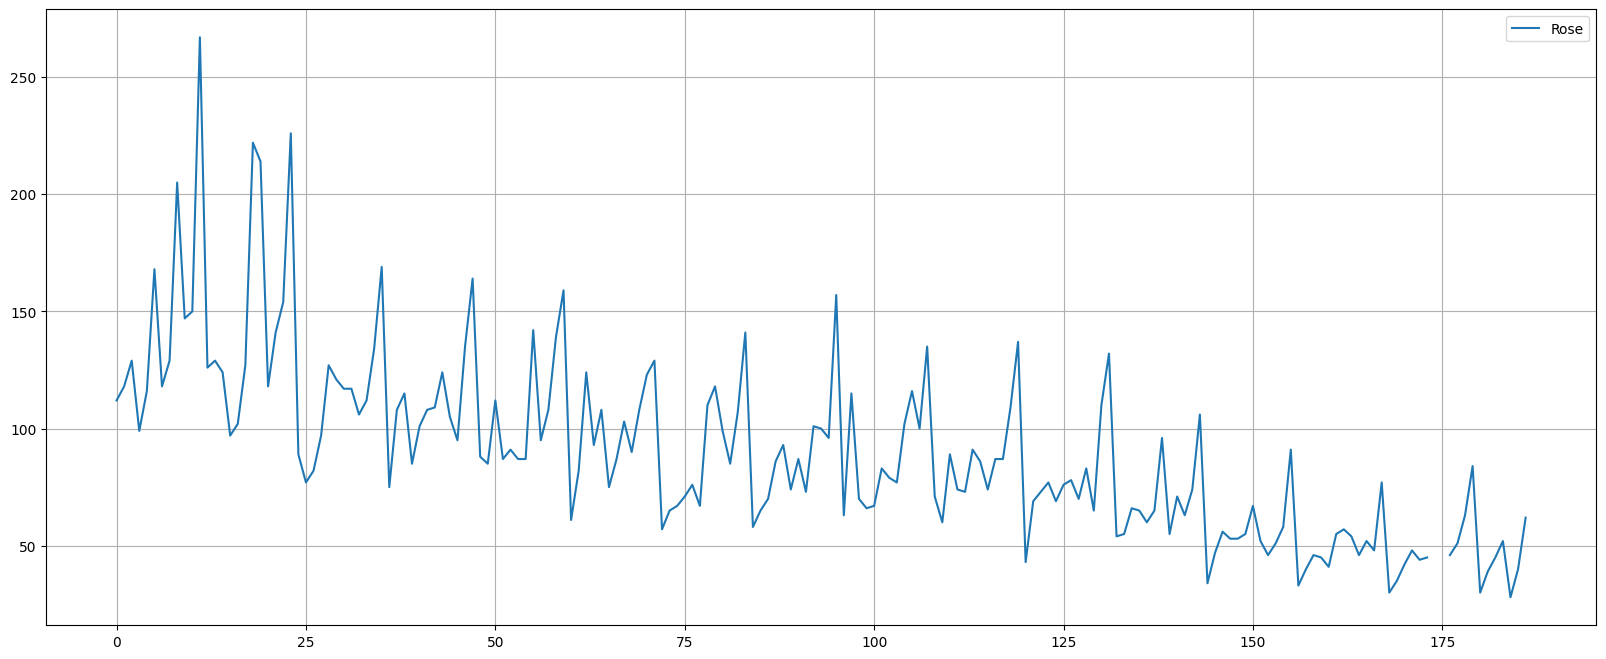

In [ ]:
# plot
df.plot(figsize=(20,8))
plt.grid();

In [ ]:
# Converting the 'YearMonth' column to datetime
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

# Set 'YearMonth' as the index
df = df.set_index('YearMonth')

# Now we can access the year and month:
df['Year'] = df.index.year
df['Month'] = df.index.month
df.head()

,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [ ]:
df.columns=['Sales', 'Year', 'Month']
df.head()

,Sales,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [ ]:
df.tail()

,Sales,Year,Month
YearMonth,,,
1995-03-01,45.0,1995,3
1995-04-01,52.0,1995,4
1995-05-01,28.0,1995,5
1995-06-01,40.0,1995,6
1995-07-01,62.0,1995,7


In [ ]:
# number of rows and columns
df.shape

(187, 3)

## 1.3 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [ ]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   185 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [ ]:
# statistical summary
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Sales,185.0,90.0,39.0,28.0,63.0,86.0,112.0,267.0
Year,187.0,1987.0,5.0,1980.0,1983.0,1987.0,1991.0,1995.0
Month,187.0,6.0,3.0,1.0,3.0,6.0,9.0,12.0


##Missing value treatement

In [ ]:
# isnull
df.isnull().sum()

,0
Sales,2
Year,0
Month,0


In [ ]:
df[df['Sales'].isna()]

,Sales,Year,Month
YearMonth,,,
1994-07-01,NaN,1994,7
1994-08-01,NaN,1994,8


In [ ]:
df['Sales_Before_After_Mean']=df['Sales']

In [ ]:
np.mean(df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [ ]:
df.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])
df.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==8]['1993-08-01':'1995-08-01']['Sales'])

df[df['Sales_Before_After_Mean'].isna()]

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,


In [ ]:
df.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,
1994-07-01,NaN,1994,7,59.5
1994-08-01,NaN,1994,8,54.0


In [ ]:
df[df.Month==7]

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,
1980-07-01,118.0,1980,7,118.0
1981-07-01,222.0,1981,7,222.0
1982-07-01,117.0,1982,7,117.0
1983-07-01,109.0,1983,7,109.0
1984-07-01,87.0,1984,7,87.0
1985-07-01,87.0,1985,7,87.0
1986-07-01,110.0,1986,7,110.0
1987-07-01,87.0,1987,7,87.0
1988-07-01,79.0,1988,7,79.0


In [ ]:
df[df.Month==8]

,Sales,Year,Month,Sales_Before_After_Mean
YearMonth,,,,
1980-08-01,129.0,1980,8,129.0
1981-08-01,214.0,1981,8,214.0
1982-08-01,117.0,1982,8,117.0
1983-08-01,124.0,1983,8,124.0
1984-08-01,142.0,1984,8,142.0
1985-08-01,103.0,1985,8,103.0
1986-08-01,118.0,1986,8,118.0
1987-08-01,73.0,1987,8,73.0
1988-08-01,77.0,1988,8,77.0


In [ ]:
df.drop(['Sales'],inplace=True,axis=1)

df.head()

,Year,Month,Sales_Before_After_Mean
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [ ]:
# fill missing values in sales with the mean
df.columns=['Year', 'Month', 'Sales']
df.isnull().sum()

,0
Year,0
Month,0
Sales,0


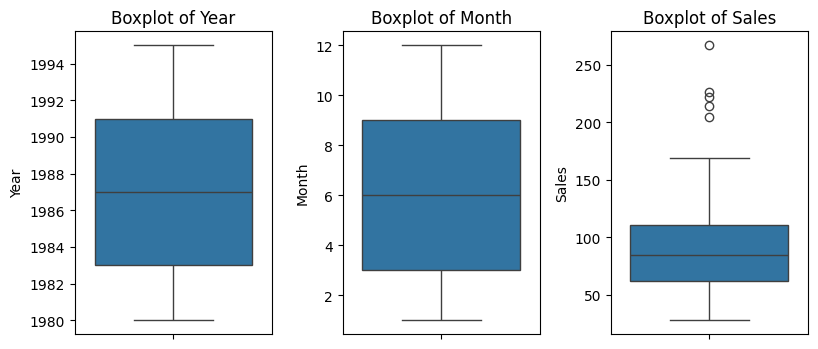

In [ ]:
# boxplot

dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Sales

<Axes: xlabel='YearMonth'>

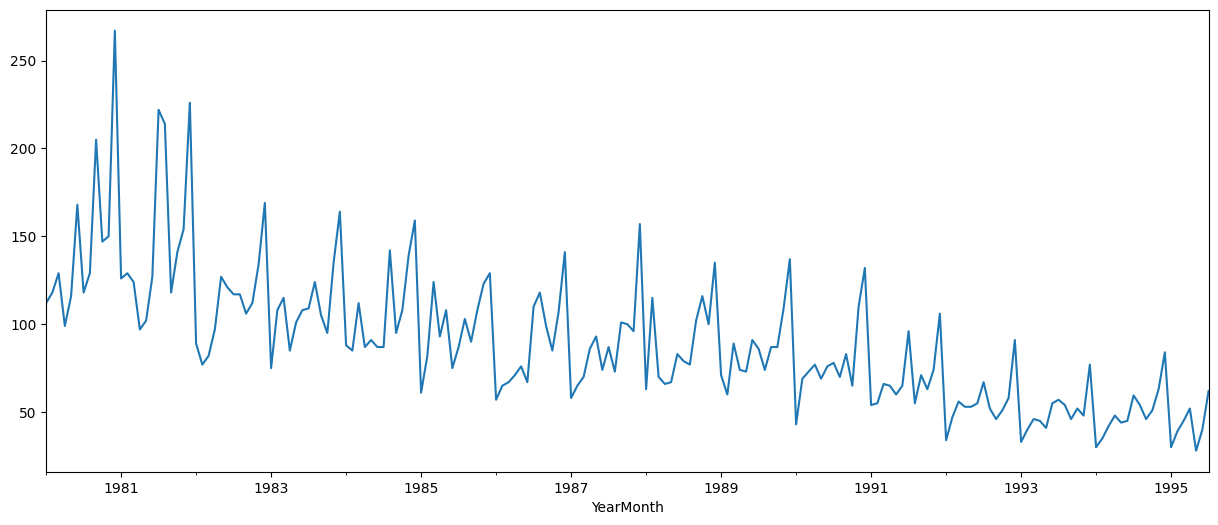

In [ ]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

### Yearly Boxplot

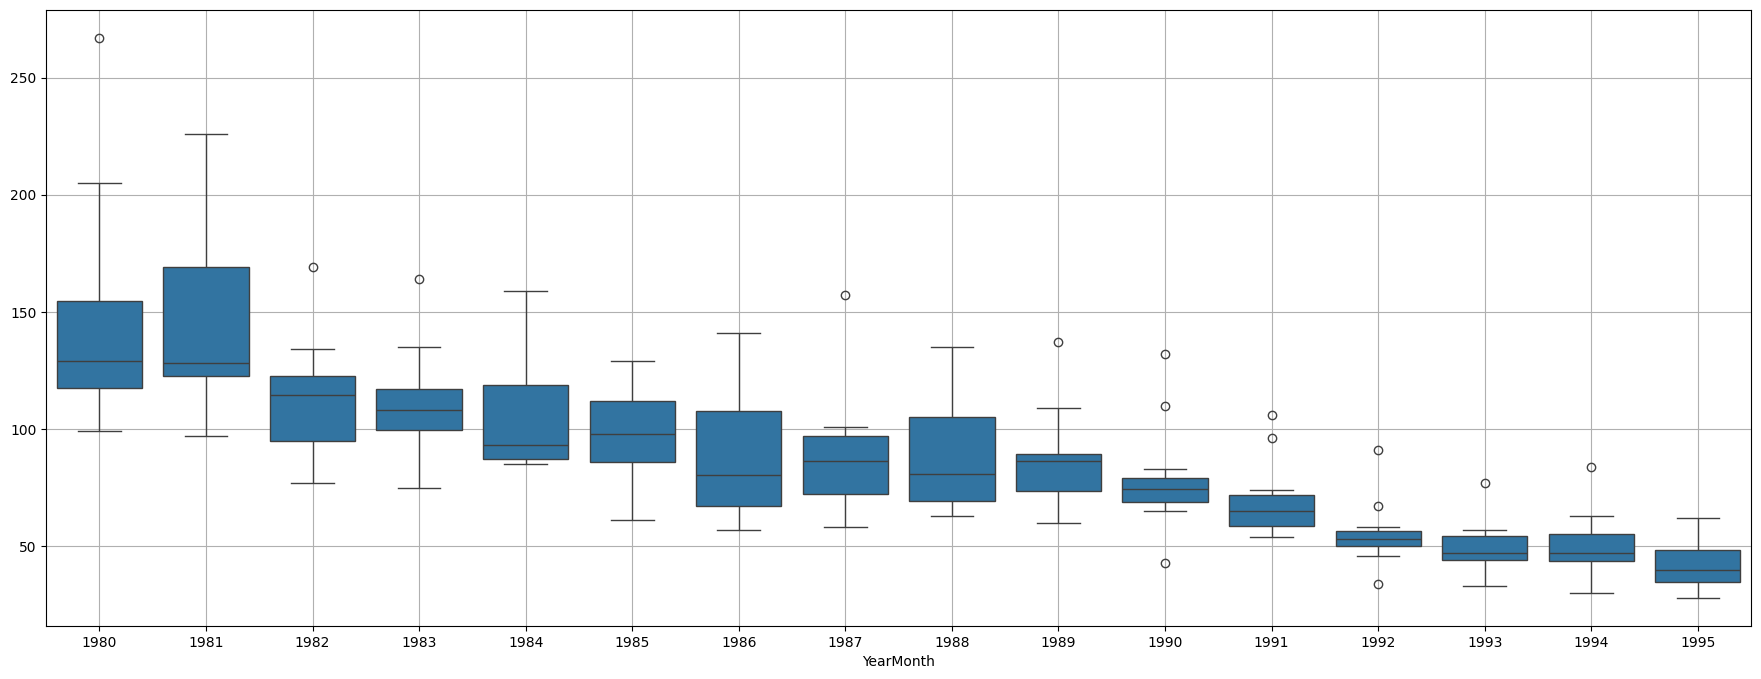

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,2],ax=ax)
plt.grid();

### Monthly Boxplot

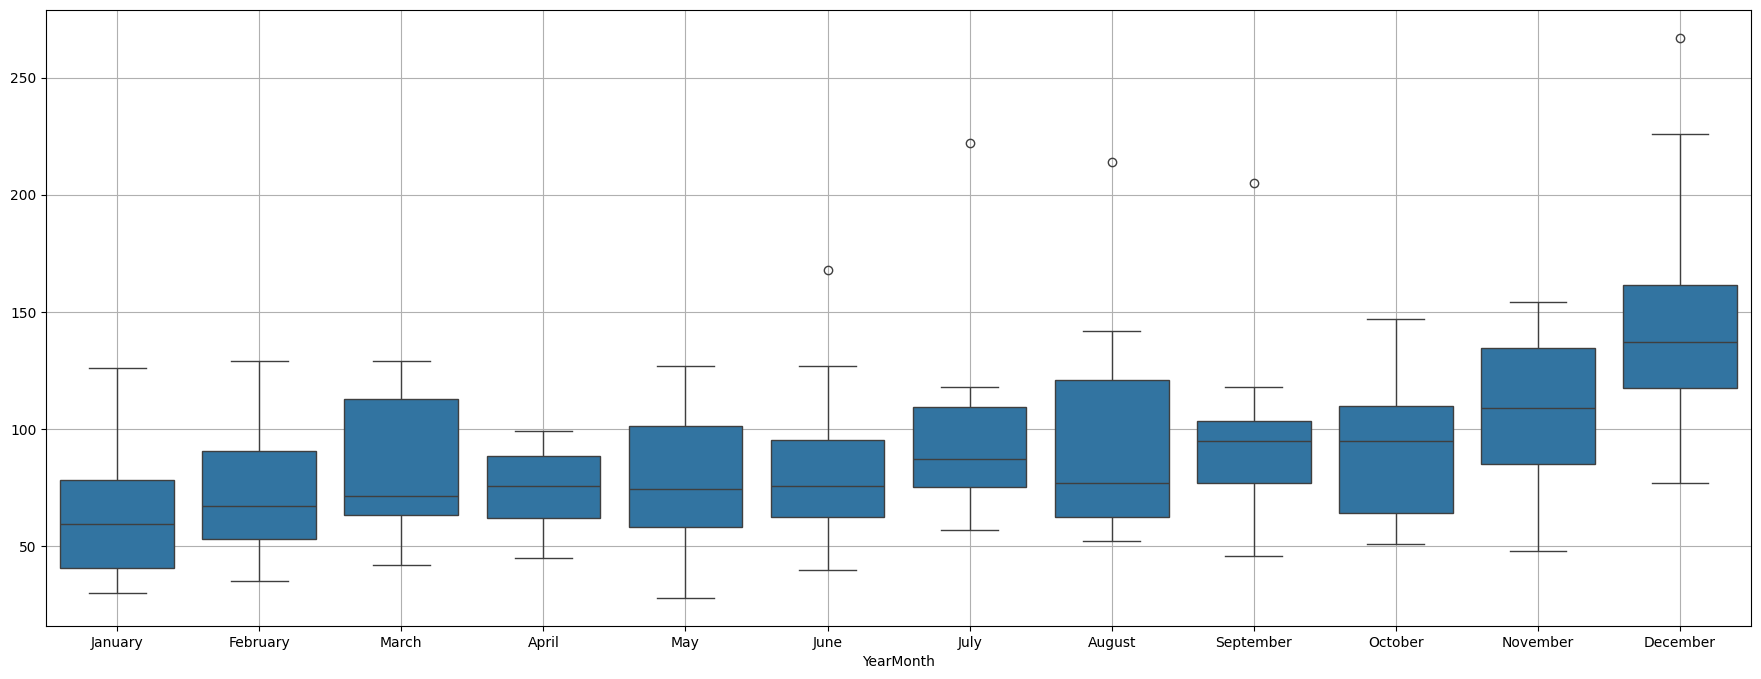

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,2],ax=ax)
plt.grid();

### Week Days Boxplot

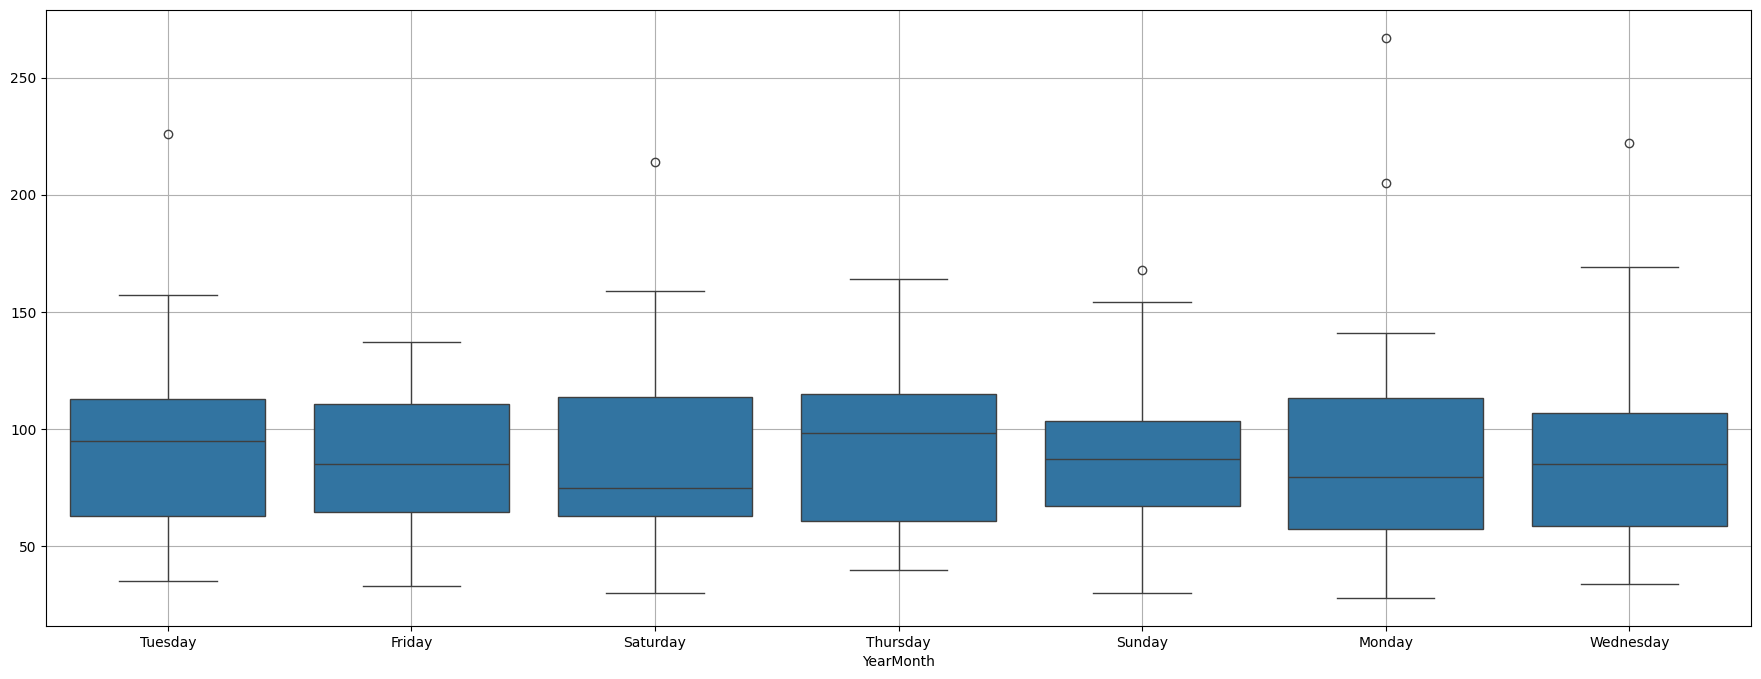

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,2],ax=ax)
plt.grid();

### Graph of monthly sales across years.

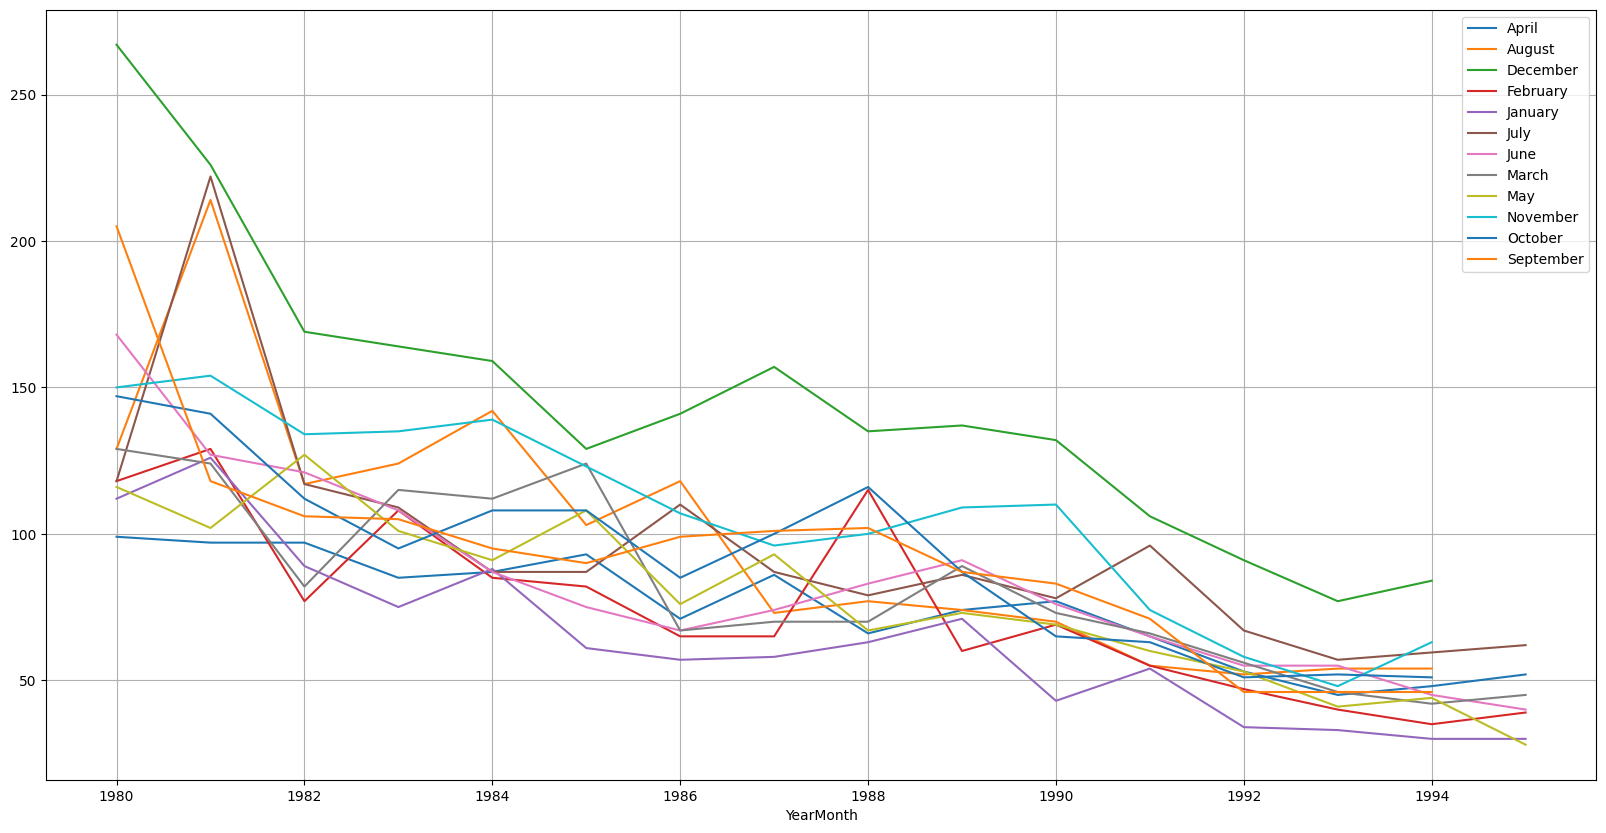

In [ ]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Correlation plot

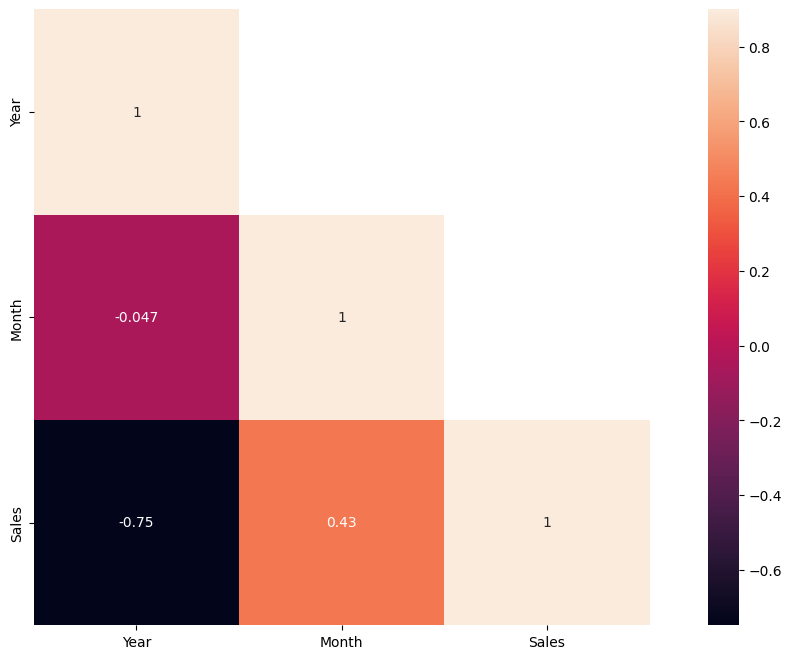

In [ ]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

### Plot ECDF: Empirical Cumulative Distribution Function

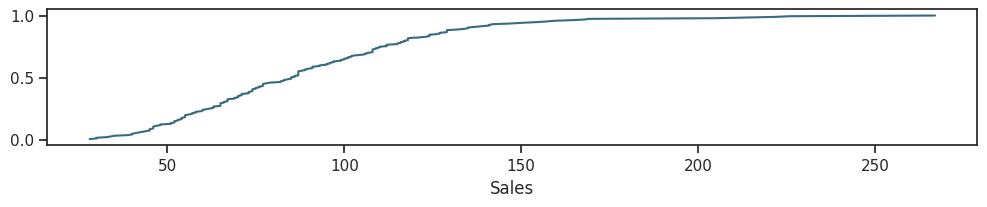

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))


plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

### Decomposition

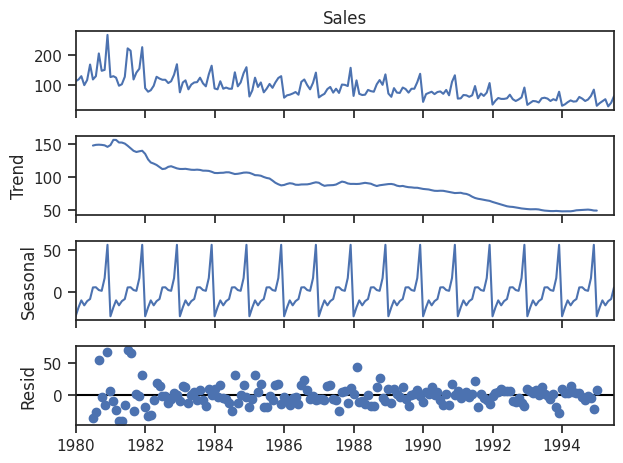

In [ ]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.28477

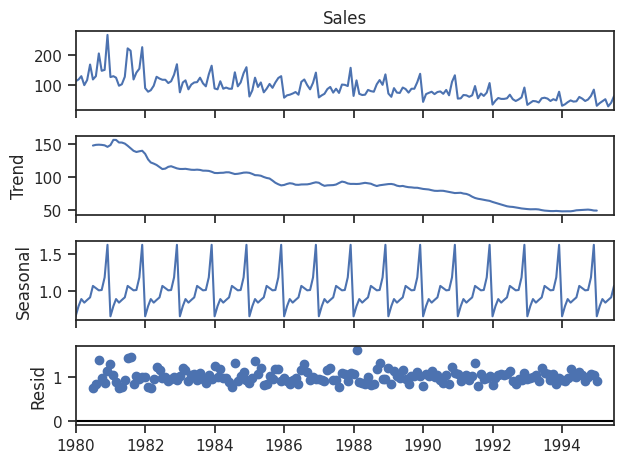

In [ ]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Name: resid, dtype: fl

## 1.3 Split the data into training and test. The test data should start in 1991.

In [ ]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [ ]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-0

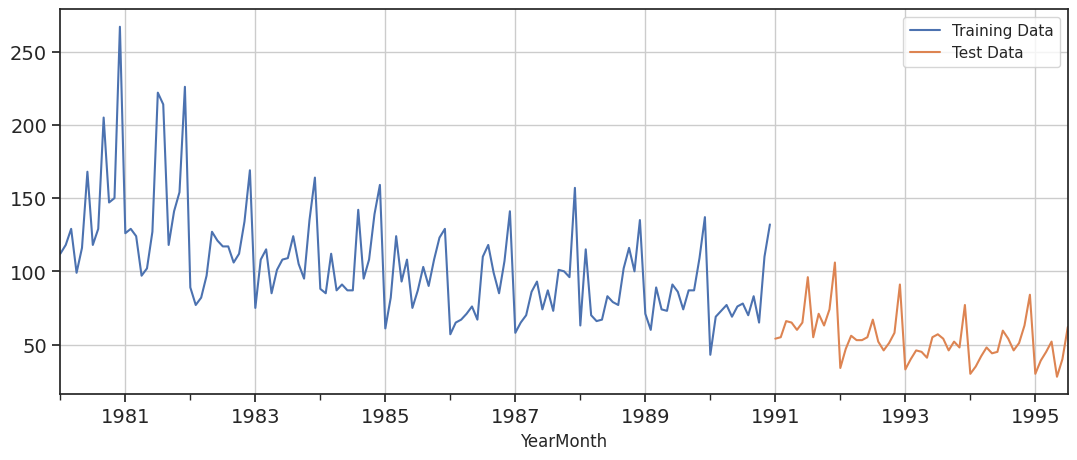

In [ ]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 1.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as linear regression & simple average models should also be built on the training data and check the performance on the test data using RMSE.

- Model 1: Linear Regression
- Model 2: Simple Average
- Model 3: Moving Average(MA)
- Model 4: Simple Exponential Smoothing
- Model 5: Double Exponential Smoothing (Holt's Model)
- Model 6: Triple Exponential Smoothing (Holt - Winter's Model)  

### Model 1: Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [ ]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

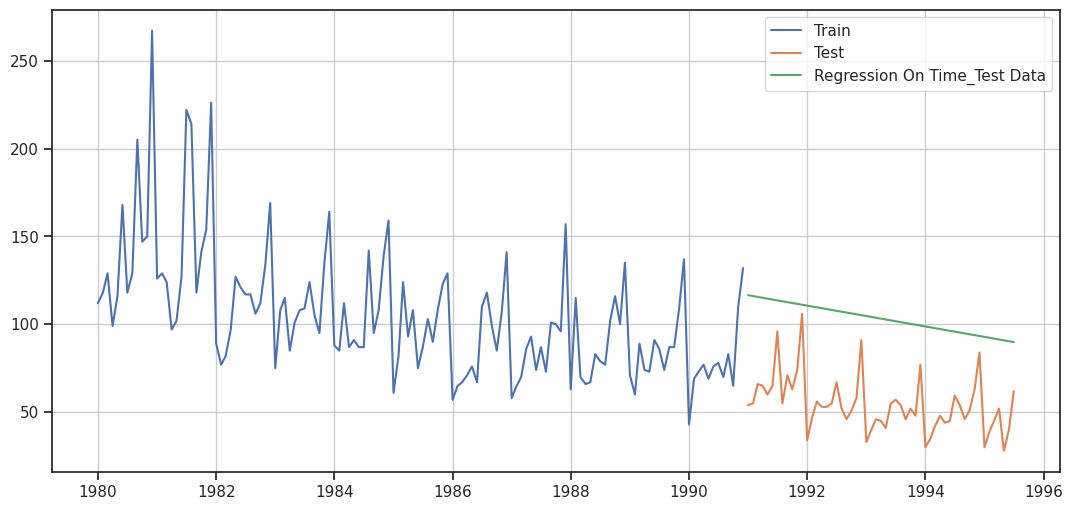

In [ ]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [ ]:
## Test Data - RMSE

rmse_model1_test = np.sqrt(metrics.mean_squared_error(test['Sales'], test_predictions_model1))
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,51.080941


### Method 2: Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Year,Month,Sales,mean_forecast
YearMonth,,,,
1991-01-01,1991,1,54.0,104.939394
1991-02-01,1991,2,55.0,104.939394
1991-03-01,1991,3,66.0,104.939394
1991-04-01,1991,4,65.0,104.939394
1991-05-01,1991,5,60.0,104.939394


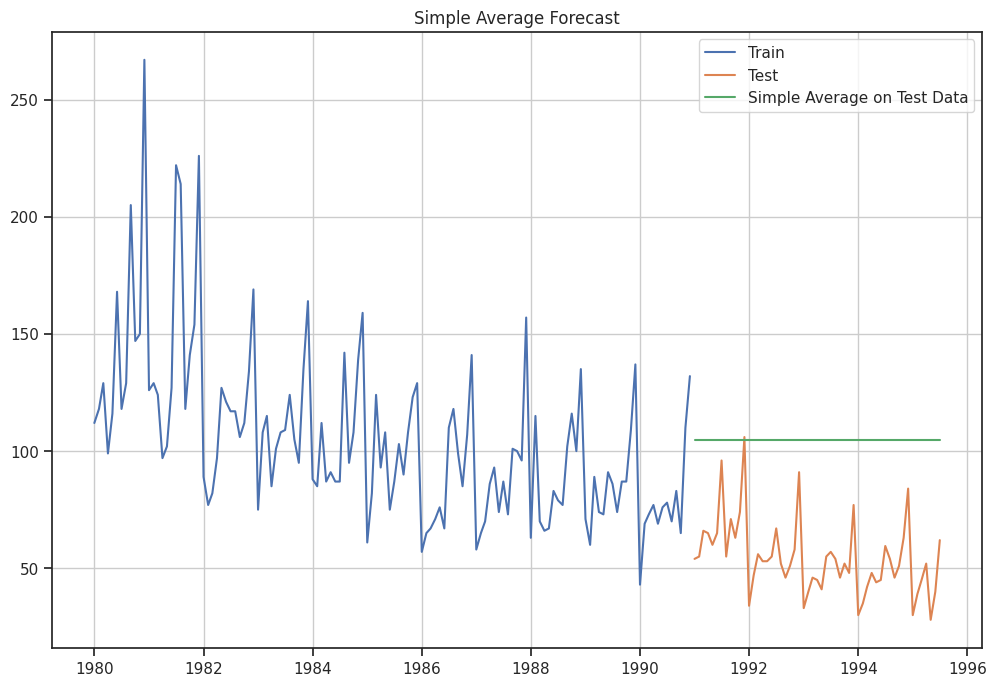

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();


#### Model Evaluation

In [ ]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'])**0.5

# taking square root to calculate RMSE
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755


### Method 3: Moving Average(MA)

In [ ]:
MovingAverage = df.copy()
MovingAverage.head()

,Year,Month,Sales
YearMonth,,,
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Year,Month,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1980,1,112.0,NaN,NaN,NaN,NaN
1980-02-01,1980,2,118.0,115.0,NaN,NaN,NaN
1980-03-01,1980,3,129.0,123.5,NaN,NaN,NaN
1980-04-01,1980,4,99.0,114.0,114.5,NaN,NaN
1980-05-01,1980,5,116.0,107.5,115.5,NaN,NaN


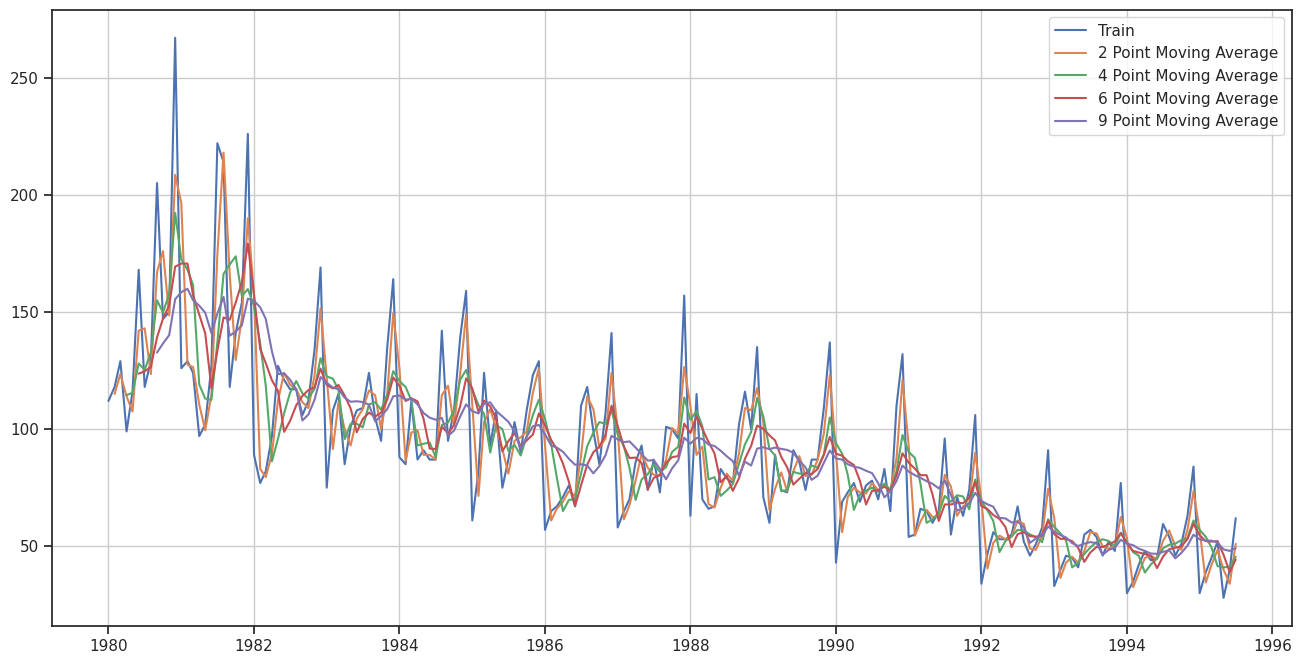

In [ ]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


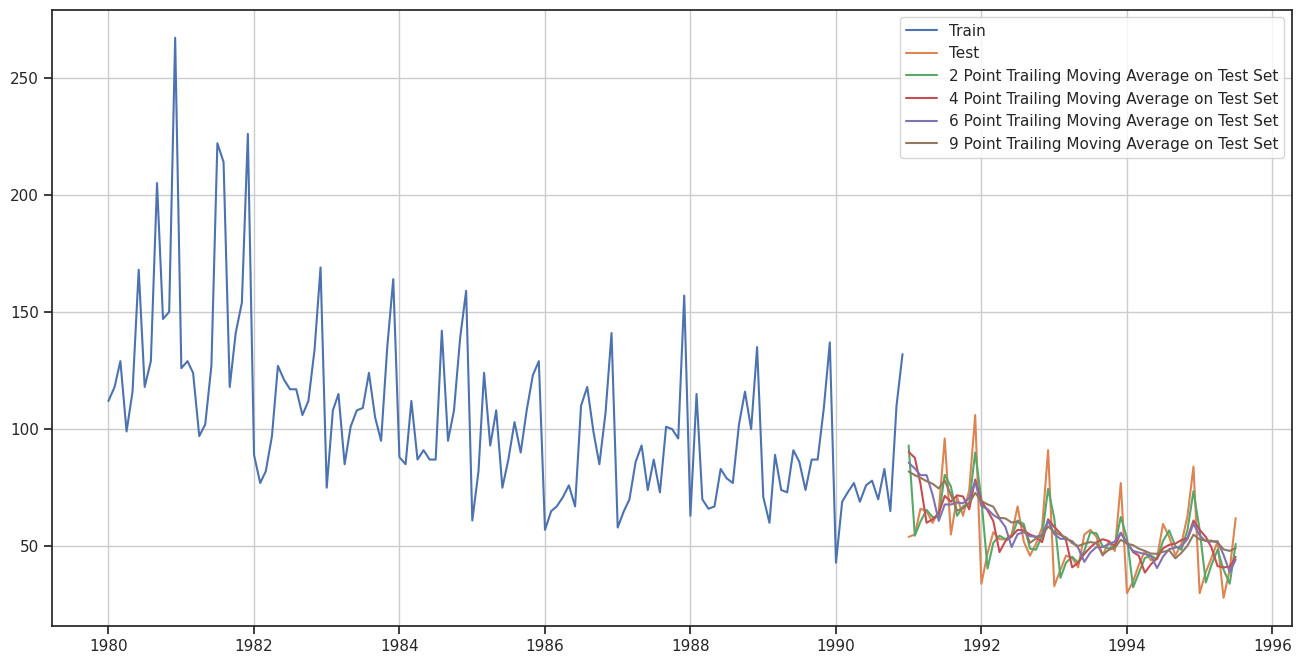

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [ ]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model3_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'])**0.5

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model3_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'])**0.5

## Test Data - RMSE --> 6 point Trailing MA
rmse_model3_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'])**0.5

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model3_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'])**0.5

In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_2,rmse_model3_test_4
                                          ,rmse_model3_test_6,rmse_model3_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139


### Method 4: Simple Exponential Smoothing

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [ ]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,87.983765
1991-02-01,1991,2,55.0,87.983765
1991-03-01,1991,3,66.0,87.983765
1991-04-01,1991,4,65.0,87.983765
1991-05-01,1991,5,60.0,87.983765


In [ ]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))


    rmse_model4_train_i = np.sqrt(metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i]))

    rmse_model4_test_i = np.sqrt(metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i]))

# Create a temporary DataFrame for the current iteration's results
    temp_df = pd.DataFrame({'Alpha Values': [i], 'Train RMSE': [rmse_model4_train_i], 'Test RMSE': [rmse_model4_test_i]})

# Concatenate the temporary DataFrame to the main results DataFrame
    resultsDf_temp = pd.concat([resultsDf_temp, temp_df], ignore_index=True)


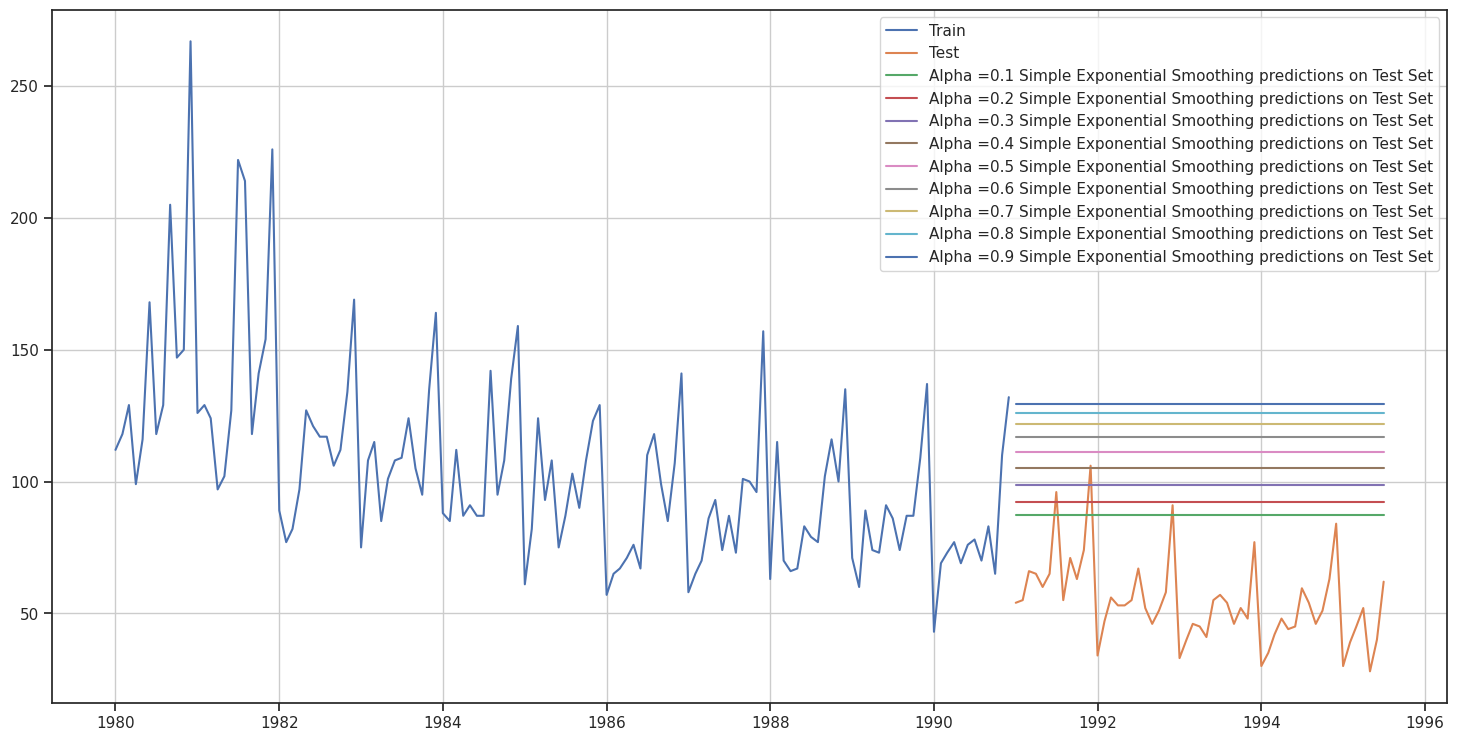

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [ ]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.429535
1,0.2,31.979391,40.957988
2,0.3,32.470164,47.096522
3,0.4,33.035130,53.356493
4,0.5,33.682839,59.229384
5,0.6,34.441171,64.558022
6,0.7,35.323261,69.284383
7,0.8,36.334596,73.359904
8,0.9,37.482782,76.725002


In [ ]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_4 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535


### Method 5: Double Exponential Smoothing (Holt's Model)

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Sales'])

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213321015010723,
 'smoothing_trend': 0.13152155372234675,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Year,Month,Sales,predict
YearMonth,,,,
1991-01-01,1991,1,54.0,87.249993
1991-02-01,1991,2,55.0,88.152722
1991-03-01,1991,3,66.0,89.055451
1991-04-01,1991,4,65.0,89.958180
1991-05-01,1991,5,60.0,90.860910


In [ ]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [ ]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'])**0.5
# Calculate RMSE by taking the square root of MSE
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.193


In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))

        # Calculate MSE and then take the square root for RMSE
        rmse_model5_train = np.sqrt(metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j]))

        rmse_model5_test = np.sqrt(metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j]))

resultsDf_5 = pd.concat([resultsDf_5, pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Train RMSE': [rmse_model5_train], 'Test RMSE': [rmse_model5_test]})], ignore_index=True)
resultsDf_5

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,1.0,1.0,63.873454,779.536777


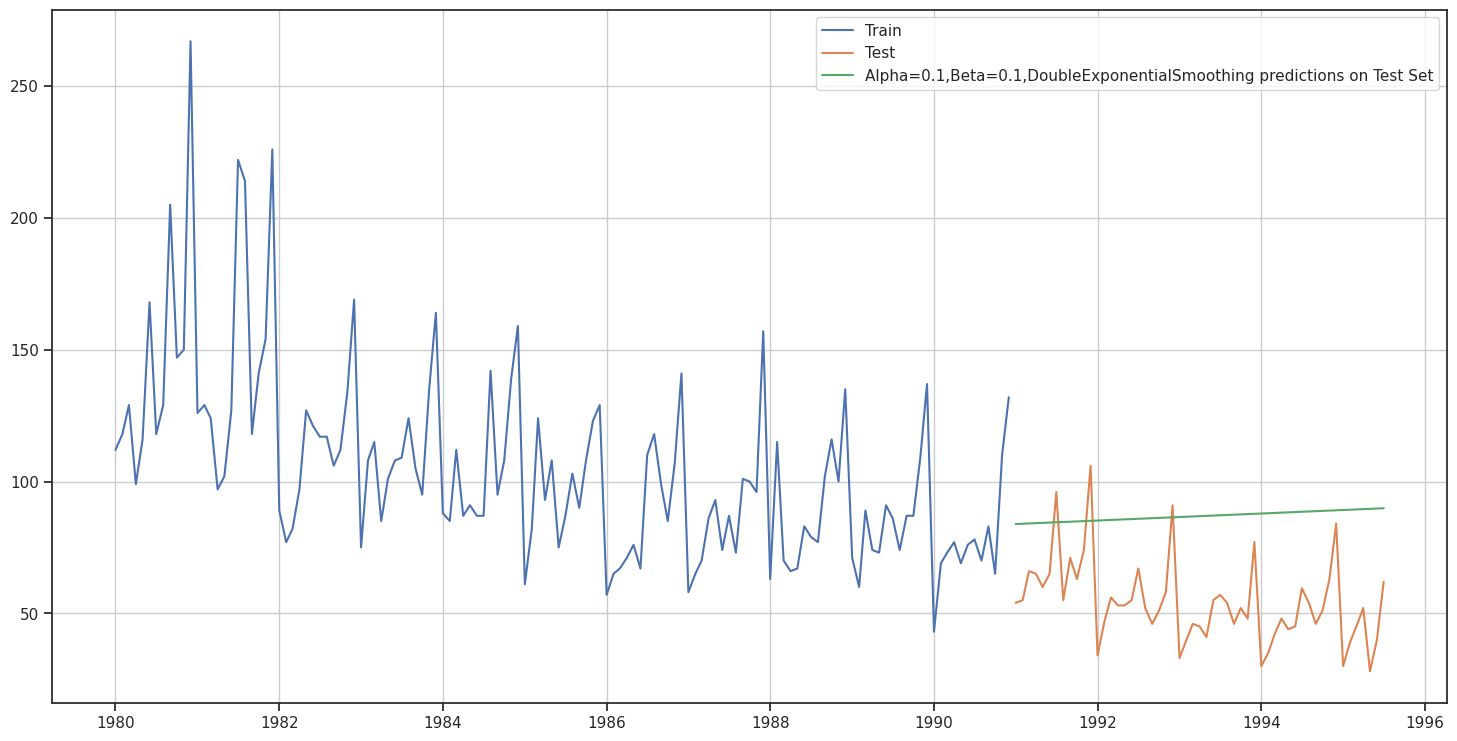

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [ ]:
resultsDf_5.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,1.0,1.0,63.873454,779.536777


In [ ]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",779.536777


### Method 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [ ]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [ ]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.053527754869099636,
 'smoothing_trend': 0.03326784064001227,
 'smoothing_seasonal': 1.1369165069859105e-05,
 'damping_trend': nan,
 'initial_level': 114.21180446123547,
 'initial_trend': 0.9923631726352484,
 'initial_seasons': array([0.99382377, 1.12786066, 1.23494689, 1.07812886, 1.21324338,
        1.31945262, 1.44982009, 1.54564845, 1.4653871 , 1.43209206,
        1.67215844, 2.30190104]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.14642857142857144,
 'smoothing_trend': 0.05324675324675325,
 'smoothing_seasonal': 0.13131868131868132,
 'damping_trend': nan,
 'initial_level': 145.27499999999992,
 'initial_trend': 1.0052617032482805,
 'initial_seasons': array([-30.484375  , -25.046875  , -15.53645833, -30.734375  ,
        -16.46354167,  -9.72395833,  12.44270833,  17.53645833,
          5.55729167,  -3.890625  ,  15.99479167,  80.34895833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa
YearMonth,,,,
1991-01-01,1991,1,54.0,42.574560
1991-02-01,1991,2,55.0,54.372099
1991-03-01,1991,3,66.0,61.821511
1991-04-01,1991,4,65.0,50.671639
1991-05-01,1991,5,60.0,58.932400


In [ ]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm
YearMonth,,,,,
1991-01-01,1991,1,54.0,42.574560,55.942246
1991-02-01,1991,2,55.0,54.372099,63.240624
1991-03-01,1991,3,66.0,61.821511,68.899674
1991-04-01,1991,4,65.0,50.671639,60.007486
1991-05-01,1991,5,60.0,58.932400,67.257150


In [ ]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm
YearMonth,,,,,,
1991-01-01,1991,1,54.0,42.574560,55.942246,55.753580
1991-02-01,1991,2,55.0,54.372099,63.240624,63.084055
1991-03-01,1991,3,66.0,61.821511,68.899674,68.866825
1991-04-01,1991,4,65.0,50.671639,60.007486,59.942156
1991-05-01,1991,5,60.0,58.932400,67.257150,67.252072


In [ ]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
YearMonth,,,,,,,
1991-01-01,1991,1,54.0,42.574560,55.942246,55.753580,46.284930
1991-02-01,1991,2,55.0,54.372099,63.240624,63.084055,58.354810
1991-03-01,1991,3,66.0,61.821511,68.899674,68.866825,64.361205
1991-04-01,1991,4,65.0,50.671639,60.007486,59.942156,54.433907
1991-05-01,1991,5,60.0,58.932400,67.257150,67.252072,60.002489


In [ ]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'])**0.5
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp_ta_sa))

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'])**0.5
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp_ta_sm))

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'])**0.5
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp_tm_sm))

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'])**0.5
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.128
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 18.683
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.880
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.254


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",779.536777
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623


In [ ]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_6_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_6_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k])
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_train = np.sqrt(rmse_model6_train)

            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna())
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_test = np.sqrt(rmse_model6_test)

            resultsDf_6_2 = pd.concat([resultsDf_6_2, pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
                                                      'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test],
                                                      'Method': ['ta_sa']})], ignore_index=True)



In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k])
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_train = np.sqrt(rmse_model6_train)

            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna())
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_test = np.sqrt(rmse_model6_test)

            resultsDf_6_2 = pd.concat([resultsDf_6_2, pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
                                                      'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test],
                                                      'Method': ['ta_sm']})], ignore_index=True)



In [ ]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))


            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k])
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_train = np.sqrt(rmse_model6_train)

            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna())
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_test = np.sqrt(rmse_model6_test)
            resultsDf_6_2 = pd.concat([resultsDf_6_2, pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
                                                      'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test],
                                                      'Method': ['tm_sm']})], ignore_index=True)



In [ ]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model6_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k])
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_train = np.sqrt(rmse_model6_train)

            rmse_model6_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna())
            #Calculate RMSE by taking the square root of MSE
            rmse_model6_test = np.sqrt(rmse_model6_test)
            resultsDf_6_2 = pd.concat([resultsDf_6_2, pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
                                                      'Train RMSE': [rmse_model6_train], 'Test RMSE': [rmse_model6_test],
                                                      'Method': ['tm_sa']})], ignore_index=True)


In [ ]:
TES_test.head()

,Year,Month,Sales,"(predict_ta_sa, 0.1, 0.1, 0.1)","(predict_ta_sa, 0.1, 0.1, 0.2)","(predict_ta_sa, 0.1, 0.1, 0.30000000000000004)","(predict_ta_sa, 0.1, 0.1, 0.4)","(predict_ta_sa, 0.1, 0.1, 0.5)","(predict_ta_sa, 0.1, 0.1, 0.6)","(predict_ta_sa, 0.1, 0.1, 0.7000000000000001)",...,"(predict_tm_sa, 0.9, 0.8, 0.9)","(predict_tm_sa, 0.9, 0.9, 0.1)","(predict_tm_sa, 0.9, 0.9, 0.2)","(predict_tm_sa, 0.9, 0.9, 0.30000000000000004)","(predict_tm_sa, 0.9, 0.9, 0.4)","(predict_tm_sa, 0.9, 0.9, 0.5)","(predict_tm_sa, 0.9, 0.9, 0.6)","(predict_tm_sa, 0.9, 0.9, 0.7000000000000001)","(predict_tm_sa, 0.9, 0.9, 0.8)","(predict_tm_sa, 0.9, 0.9, 0.9)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1991,1,54.0,54.539815,52.068654,50.576252,49.487204,48.433031,47.189604,45.644878,...,3.735952e+33,49.121533,76.518424,376.731488,4895.861548,5.809412e+04,1.638740e+05,-5.749099e+08,-1.981676e+12,9.552794e+39
1991-02-01,1991,2,55.0,63.750857,64.597764,64.994154,65.108834,65.031348,64.818418,64.559584,...,7.148786e+32,37.090349,76.114781,509.316662,16304.896188,6.511844e+05,2.092803e+07,-2.812972e+11,-1.592913e+17,7.303099e+38
1991-03-01,1991,3,66.0,68.670042,68.524333,68.446758,68.707100,69.292851,69.976008,70.441630,...,1.357303e+32,15.196663,47.008485,593.068850,47658.505261,5.673444e+06,8.764094e+08,-2.321151e+11,-4.477184e+20,5.583209e+37
1991-04-01,1991,4,65.0,61.295063,63.594391,65.122271,66.310311,67.480643,68.765318,70.135657,...,2.576482e+31,-2.515265,9.602428,669.057836,138695.857310,4.866318e+07,2.483195e+10,1.937298e+15,-8.742387e+22,4.268341e+36
1991-05-01,1991,5,60.0,65.953079,65.280260,64.604999,64.041810,63.733080,63.736109,64.009263,...,-1.230813e+29,-1.476818,-5.631953,759.079023,403820.871296,4.173403e+08,6.957411e+11,4.618220e+17,-2.928919e+24,-3.966771e+36


#### Model Evaluation

In [ ]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
2136,0.2,0.7,0.2,24.042290,8.992350,tm_sm
10,0.1,0.2,0.1,19.770392,9.221020,ta_sa
1010,0.1,0.2,0.1,19.770392,9.221020,ta_sm
11,0.1,0.2,0.2,20.253487,9.543696,ta_sa
1011,0.1,0.2,0.2,20.253487,9.543696,ta_sm


In [ ]:
resultsDf_6_3 = pd.DataFrame({'Test RMSE': [resultsDf_6_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_3])
resultsDf


,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",779.536777
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350


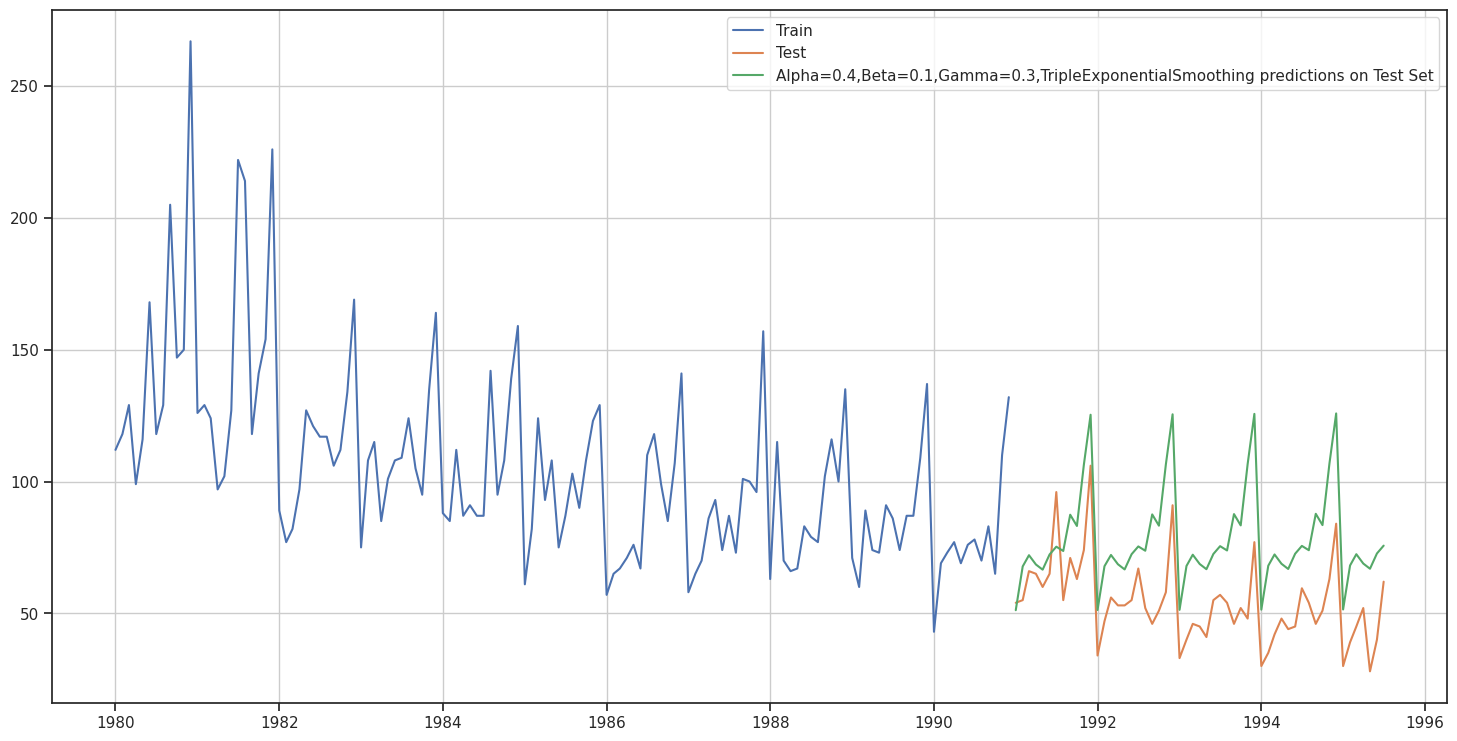

In [ ]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004],
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- H0
 : The Time Series has a unit root and is thus non-stationary.
- H1
 : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α
 value.

We see that at 5% significant level the Time Series is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

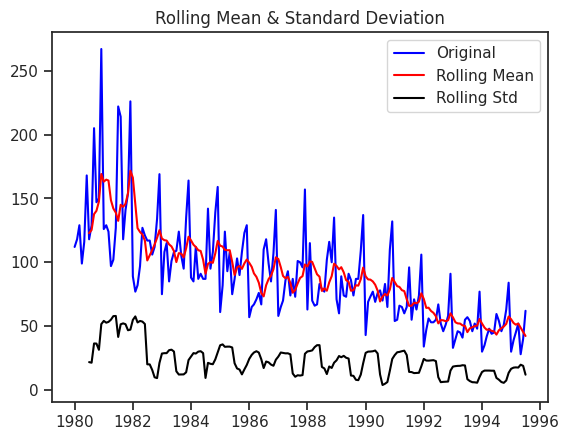

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [ ]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

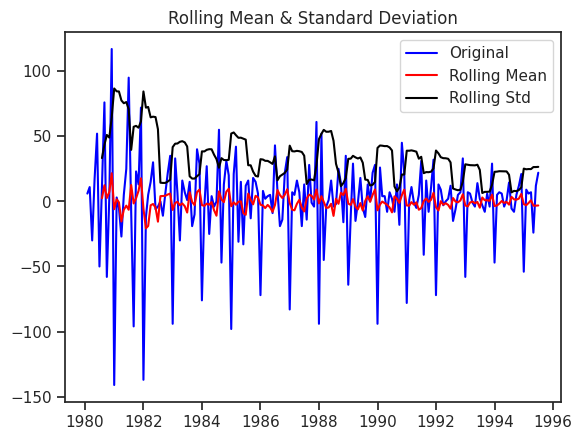

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [ ]:
test_stationarity(df['Sales'].diff().dropna())

## 1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Auto - Arima Model  

In [ ]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    # Create a temporary DataFrame for the current iteration's results
    temp_df = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    # Concatenate the temporary DataFrame to the main results DataFrame
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(0, 1, 3) - AIC:1280.545376173466
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(1, 1, 3) - AIC:1281.8707223309984
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868563
ARIMA(2, 1, 2) - AIC:1281.870722226456
ARIMA(2, 1, 3) - AIC:1274.6951271827177
ARIMA(3, 1, 0) - AIC:1297.481091727167
ARIMA(3, 1, 1) - AIC:1282.4192776271927
ARIMA(3, 1, 2) - AIC:1283.7207405977094
ARIMA(3, 1, 3) - AIC:1278.6580044819445


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.695127
15,"(3, 1, 3)",1278.658004
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.574230
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


In [ ]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 16 Feb 2025   AIC                           1274.695
Time:                        17:06:37   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.034      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.644      1.622      0.1

### Predict on the Test Set using this model and evaluate the model.

In [ ]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

# Calculate MSE and then take the square root for RMSE
mse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist())
rmse = np.sqrt(mse)
print(rmse)

36.41857305254275


In [ ]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",779.536777
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350


## AUTO- SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],
                                                          'seasonal': [param_seasonal],
                                                          'AIC': [results_SARIMA.aic]})],
                               ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207298
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3537.579168905919
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386172
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575225
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4554.32909051064
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945757
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4397.822817992214
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702748039
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.53041361288
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3467.855628476979
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 1

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400287
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880936
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


In [ ]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 16 Feb 2025   AIC                            774.400
Time:                                         17:10:56   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

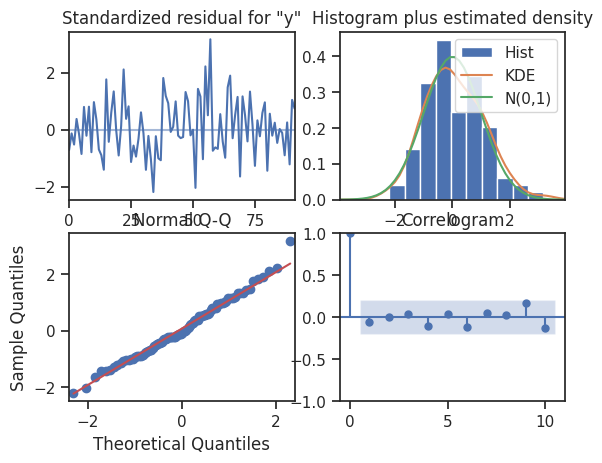

In [ ]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [ ]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.237188,13.907058,27.979855,82.494520
1,68.122541,13.990531,40.701604,95.543478
2,67.909380,14.011597,40.447154,95.371605
3,66.786145,14.098878,39.152852,94.419438
4,69.761986,14.108245,42.110334,97.413638


In [ ]:
rmse = mean_squared_error(test['Sales'], predicted_auto_SARIMA_6.predicted_mean) ** 0.5
# Calculate RMSE by taking the square root of MSE
print(rmse)

18.53571641047434


In [ ]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",779.536777
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350


## 1.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Model 11 : Manual ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

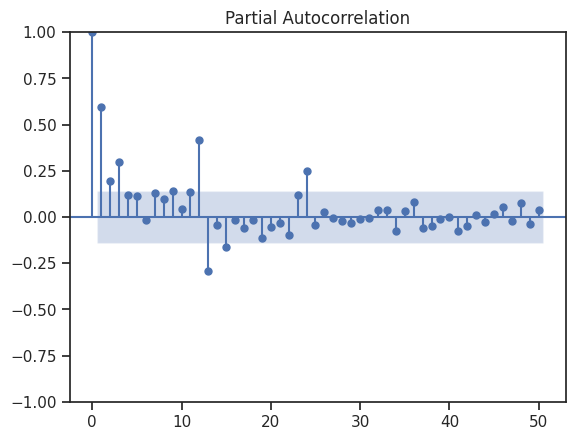

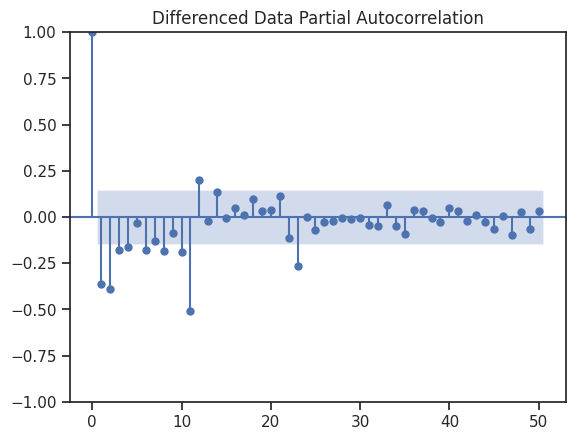

In [ ]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

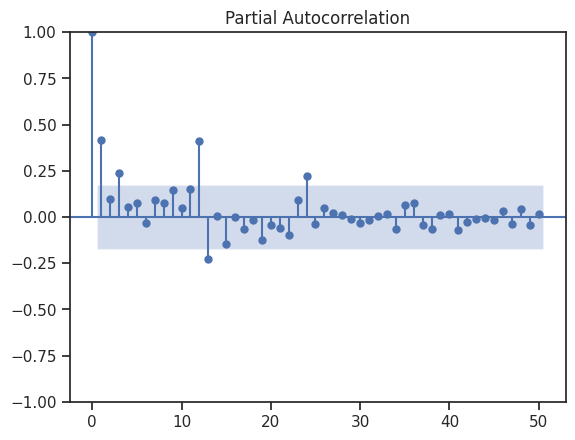

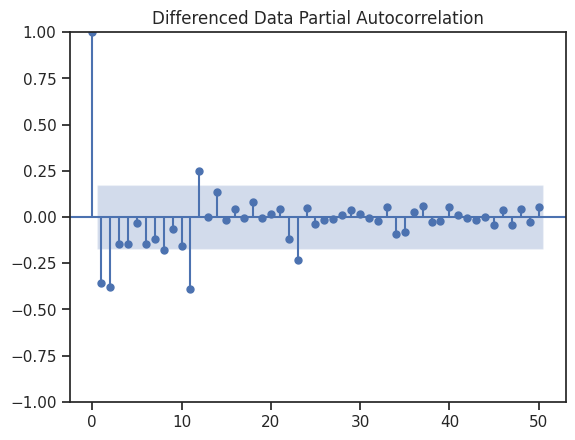

In [ ]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
manual_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 16 Feb 2025   AIC                           1281.871
Time:                        17:10:58   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

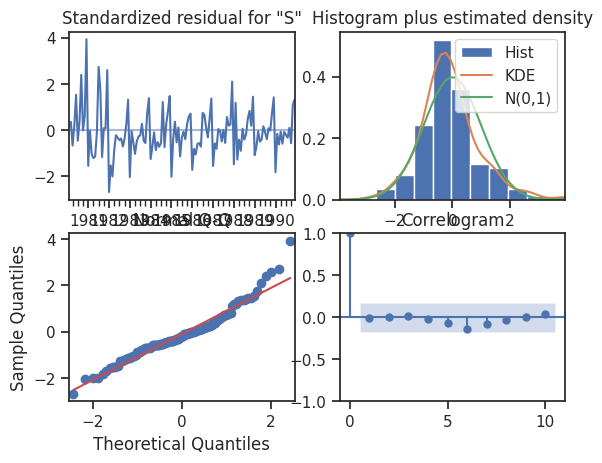

In [ ]:
results_manual_ARIMA.plot_diagnostics();

### Model evaluation

In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(test['Sales'], predicted_manual_ARIMA)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 36.47322487644555


In [ ]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",779.536777
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350


#### Model 12 : Manual SARIMA

In [ ]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.016
Date:                            Sun, 16 Feb 2025   AIC                           1094.031
Time:                                    17:11:01   BIC                           1119.044
Sample:                                         0   HQIC                          1104.188
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5491      0.228     -2.408      0.016      -0.996      -0.102
ar.L2         -0.0744      0.099   

In [ ]:
# Create a DataFrame for the new row
new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_manual_SARIMA.aic]})

# Use concat to add the new row to SARIMA_AIC
SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)
SARIMA_AIC

,param,seasonal,AIC
0,"(3, 1, 3)","(3, 0, 3, 12)",1094.031391


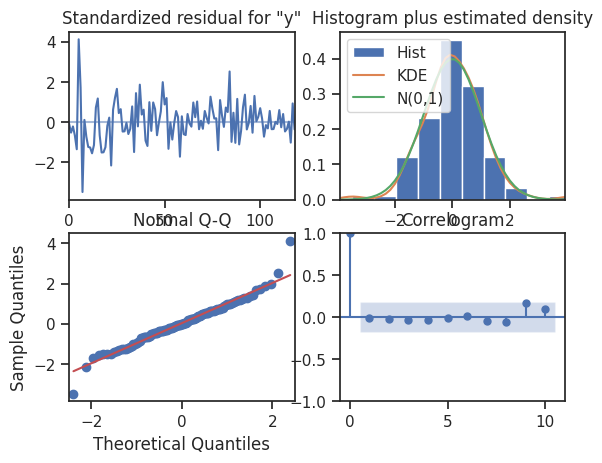

In [ ]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [ ]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,38.859008,21.079974,-2.456983,80.174998
1,65.275466,21.893683,22.364635,108.186297
2,60.204460,21.939663,17.203510,103.205410
3,59.294918,22.254024,15.677833,102.912003
4,60.592880,22.300319,16.885057,104.300703


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse_manual_sarima = np.sqrt(mean_squared_error(test['Sales'], predicted_manual_SARIMA_6.predicted_mean))
print(rmse_manual_sarima)

14.974153254328549


In [ ]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",779.536777
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350


## 1.8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"(2,1,2)(2,1,2,12),Manual_SARIMA",14.974153
"(3,1,1),(3,0,2,12),Auto_SARIMA",18.535716
Auto_ARIMA,36.418573
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"ARIMA(3,1,3)",36.473225


## 1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [ ]:
# prediction

In [ ]:
TES_train = df.copy()

In [ ]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [ ]:
future_predictions['Sales_Predictions']=prediction
future_predictions

,Sales_Predictions
1995-08-01,36.096841
1995-09-01,34.999961
1995-10-01,36.289937
1995-11-01,43.126839
1995-12-01,61.593978
1996-01-01,24.293852
1996-02-01,31.406019
1996-03-01,37.545514
1996-04-01,39.735393
1996-05-01,33.753457


In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,-6.382843,36.096841,78.576525
1995-09-01,-7.479723,34.999961,77.479645
1995-10-01,-6.189747,36.289937,78.769621
1995-11-01,0.647155,43.126839,85.606523
1995-12-01,19.114294,61.593978,104.073662


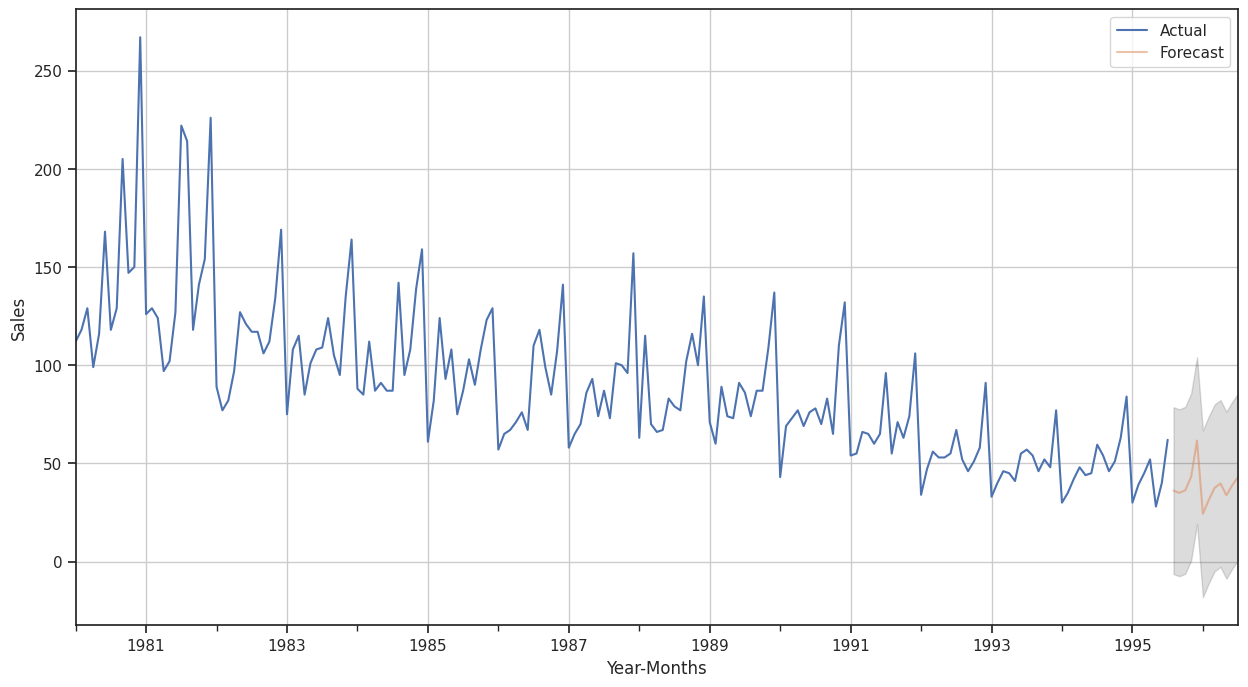

In [ ]:
# plot the forecast along with the confidence band

axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## Actionable Insights and recommendations

●	The analysis of the wine sales data indicates a clear downward trend for the Rose wine variety for the company, which has been declining in popularity for more than a decade.

●	This trend is expected to continue in the future as well, based on the predictions of the most optimal model.

●	Wine sales are highly inﬂuenced by seasonal changes, with sales increasing during festival season and dropping during peak winter time i.e. January.

●	The company should consider running campaigns to boost the consumption of the wine during the rest of the year, as sales are subdued during this period.

●	Campaigns during the lean period (April to June) might yield maximum results for the company, as sales are low during this period, and boosting them would increase the overall performance of the wine in the market across the year.

●	Running campaigns during peak periods (such as during festivals) might not generate significant impact on sales, as they are already high during this time of the year.

●	Campaigns during peak winter time (January) are not recommended as people are less likely to purchase wine due to climatic reasons, and running campaigns during this period may not change people's opinion.

●	The company should also consider exploring reasons behind the decline in popularity of the Rose wine variety, and if needed, revamp its production and marketing strategies to regain the market share.
